# **Censur Income Project**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv('census-income.csv',skipinitialspace=True)
# df
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Intellipaath Dataset/Censur Income/census-income.csv',skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df=df.rename(columns={"Unnamed: 14":"income"})

In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 32561, dtype: object

In [ ]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df['income'].value_counts()/df['income'].count()

<=50K    0.751078
>50K     0.248922
Name: income, dtype: float64

In [ ]:
# if(df['marital-status'] == 'Never-married'):
#     df['marital-status']

In [ ]:
# if 'Never-married' not in df['marital-status'].values:
#     print(df['marital-status'])
df['marital-status'].count()

30162

In [ ]:
(df['hours-per-week'] < 20).sum()

1334

In [ ]:
df['hours-per-week'].value_counts()

40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: hours-per-week, Length: 94, dtype: int64

In [ ]:
# Compute how many samples of the population are never married and working hours less than 20 hours?
df[( (df['marital-status'] == 'Never-married')  & (df['hours-per-week'] < 20))].shape
# Now check the shape

(785, 15)

In [ ]:
#6) Choose the correct list of age with minimum age , maximum and 50th Percentile of the age group?
# df['age'].min()
# df['age'].max()
# df['age'].quantile(0.5)

In [ ]:
# From above census data which country has the highest population and  the lowest population?
df['marital-status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df['marital-status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [ ]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.isnull().sum().sum()

4262

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.duplicated().sum()
# Find duplicated row from whole dataset

23

In [ ]:
# remove duplicate row from dataset
df=df.drop_duplicates()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# df.income.value_counts()/df.income.count()

In [ ]:
df['marital-status']

0        4
2        0
3        2
4        2
5        2
        ..
32555    4
32556    2
32557    2
32558    6
32560    2
Name: marital-status, Length: 21317, dtype: int32

In [ ]:
# Now again check duplicate in dataset
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1316ef1d3f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1316ef1d930>,
 'boxes': [<matplotlib.lines.Line2D at 0x1316ef1d150>],
 'medians': [<matplotlib.lines.Line2D at 0x1316ef1de70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1316ef1e110>],
 'means': []}

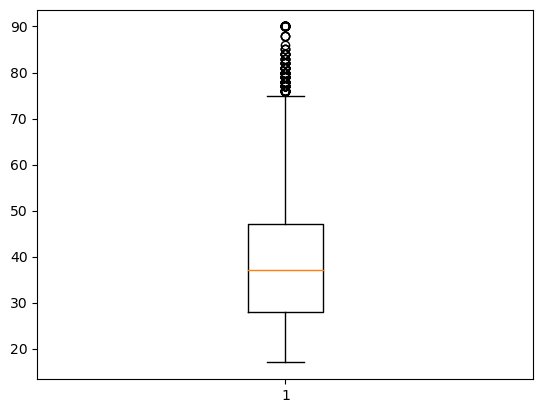

In [ ]:
plt.boxplot(df["age"])

In [ ]:
for col in df.columns:
    if df[col].dtype == 'int64':
        print(col)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


In [ ]:
for col in df.columns:
    if df[col].dtype != 'object':
        print(col)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


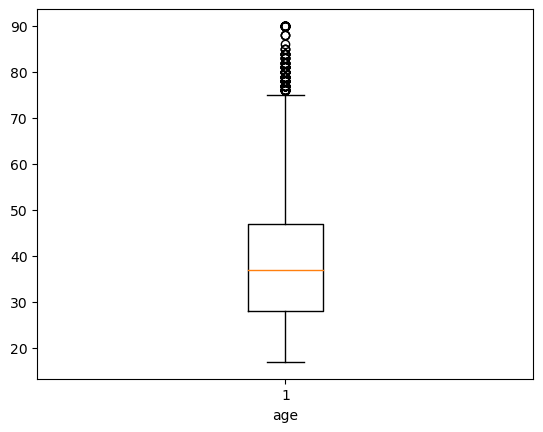

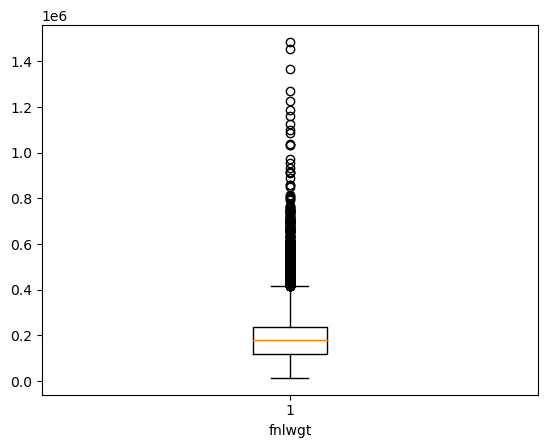

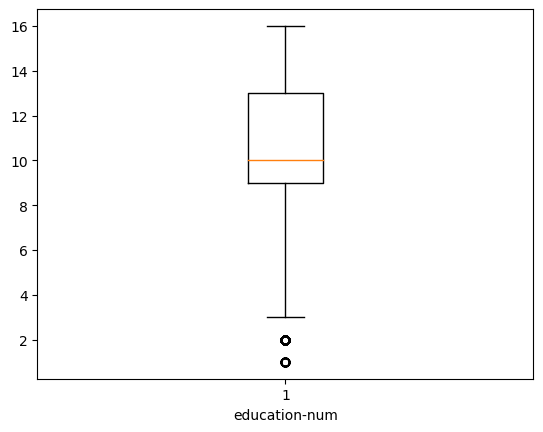

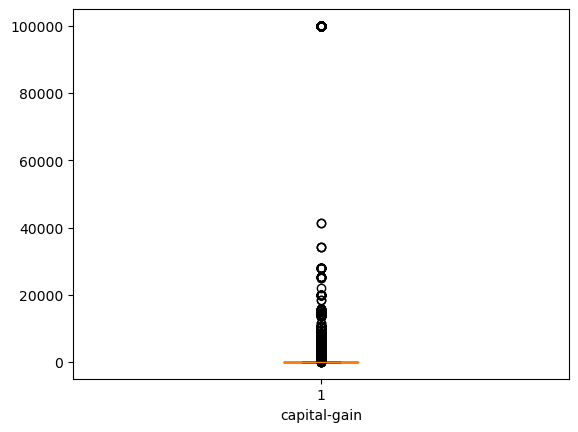

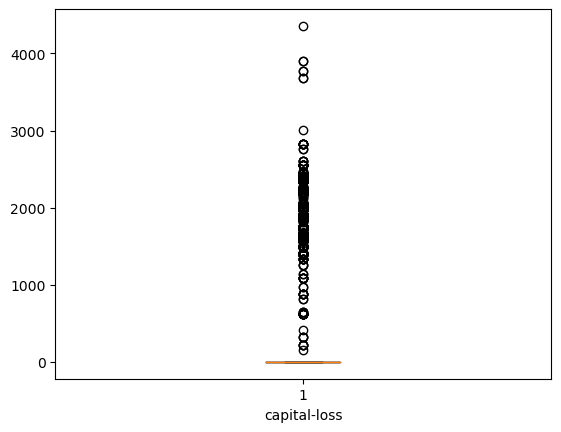

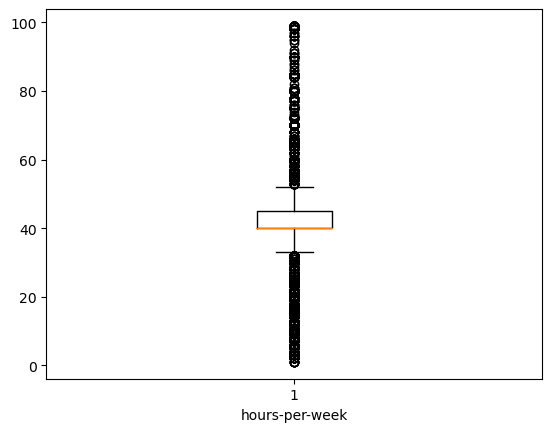

In [ ]:
for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [ ]:
# Here we skip the capital-gain and capital-loss column from outlayer removal
# Why we not taken capital-gain and capital-loss column

In [ ]:
df['capital-gain'].value_counts()

0        27601
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capital-gain, Length: 118, dtype: int64

In [ ]:
df['capital-loss'].value_counts()

0       28712
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capital-loss, Length: 90, dtype: int64

In [ ]:
# Here 0 is comes 20712 times and 1902 is comes 194 times 1 comes multiple times so if we remove outlayes
# here so we loss very huge amount of data due to this resason we can remove outlayers from these two columns
# Here Data in form of different different classes and each classes have much -2 values so we can not apply outlayer
# removal
# We can apply outlayer removal on continuous data or continuous columns
# Here data is divided in to two bunches so we can not remove any bunchs

<Axes: >

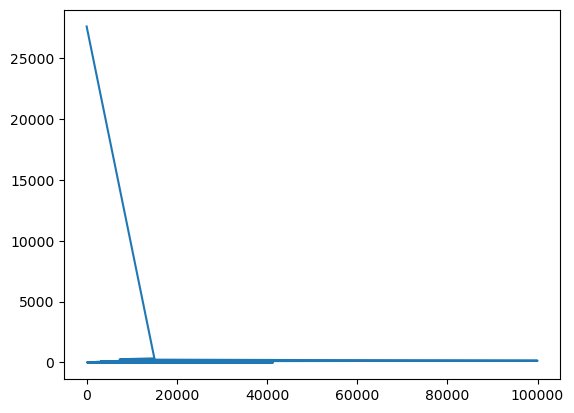

In [ ]:
df['capital-gain'].value_counts().plot()

In [ ]:
# Here in graph you can check also not clear any things

<Axes: >

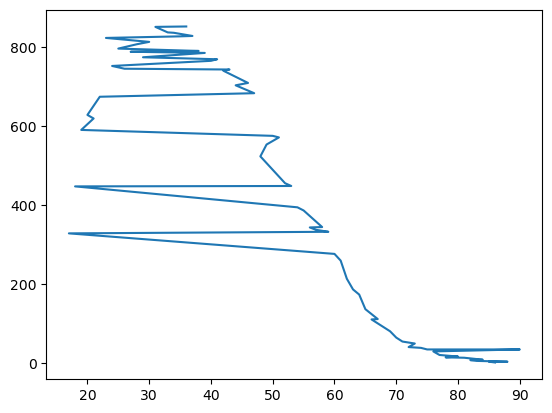

In [ ]:
df["age"].value_counts().plot()
# here you see clear the things

In [ ]:
out_layer_removal_col = ["age","fnlwgt","education-num","hours-per-week"]

In [ ]:
out_layer_removal_col

['age', 'fnlwgt', 'education-num', 'hours-per-week']

In [ ]:
for col2 in out_layer_removal_col:
    Q1 = df[col2].quantile(0.25)
    Q3 = df[col2].quantile(0.75)
    IQR = Q3-Q1
    UW = Q3+1.5*IQR
    LW = Q1-1.5*IQR
    df = df[(df[col2]>=LW) & (df[col2]<=UW)]

In [ ]:
after_out_layer_removal_col = ["age","fnlwgt","education-num","hours-per-week"]
after_out_layer_removal_col

['age', 'fnlwgt', 'education-num', 'hours-per-week']

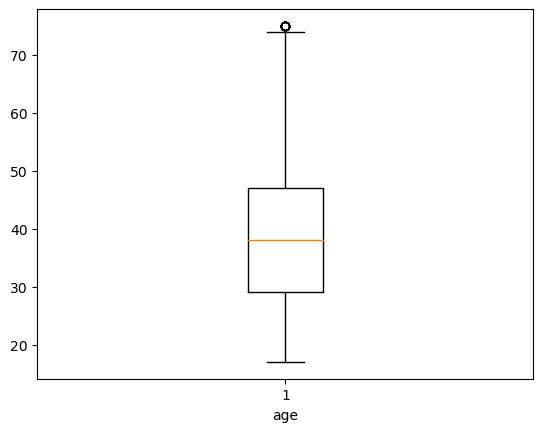

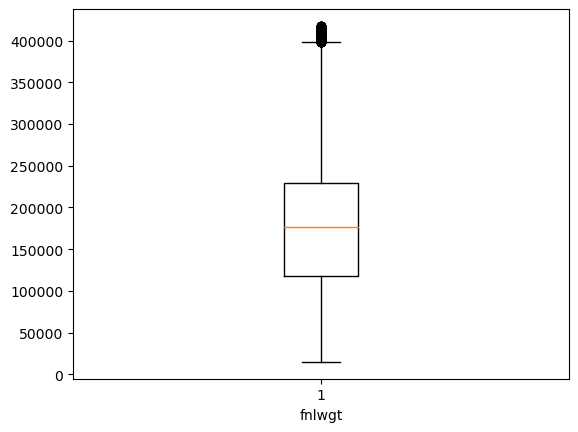

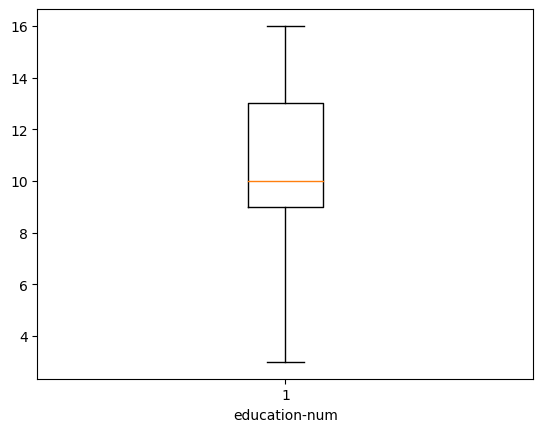

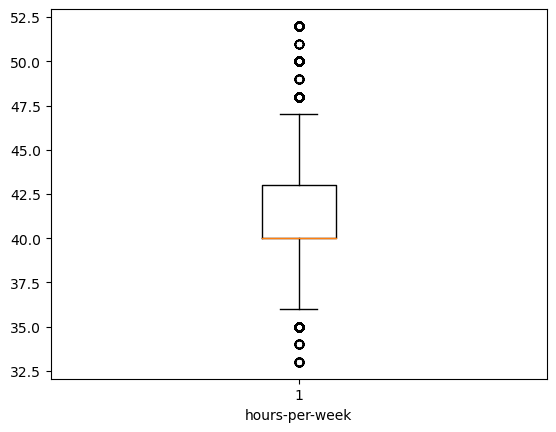

In [ ]:
for col3 in after_out_layer_removal_col:
    plt.boxplot(df[col3])
    plt.xlabel(col3)
    plt.show()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# now we call the object of the LabelEncoder class

In [ ]:
le = LabelEncoder()

In [ ]:
for cols in df.columns:
    if df[cols].dtype == "object":
        df[cols]= le.fit_transform(df[cols])

In [ ]:
df.info()
# Now all the columns is the int type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21317 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             21317 non-null  int64
 1   workclass       21317 non-null  int32
 2   fnlwgt          21317 non-null  int64
 3   education       21317 non-null  int32
 4   education-num   21317 non-null  int64
 5   marital-status  21317 non-null  int32
 6   occupation      21317 non-null  int32
 7   relationship    21317 non-null  int32
 8   race            21317 non-null  int32
 9   sex             21317 non-null  int32
 10  capital-gain    21317 non-null  int64
 11  capital-loss    21317 non-null  int64
 12  hours-per-week  21317 non-null  int64
 13  native-country  21317 non-null  int32
 14  income          21317 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 1.9 MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0


In [ ]:
df['income'].value_counts()

0    15709
1     5608
Name: income, dtype: int64

In [ ]:
df['sex'].value_counts()

1    14703
0     6614
Name: sex, dtype: int64

In [ ]:
df['native-country'].value_counts()

38    19521
25      365
29      152
10       94
32       81
18       72
4        69
1        68
22       62
8        58
7        58
39       50
2        50
5        48
34       45
21       45
30       44
3        41
23       40
12       34
19       28
35       27
13       26
31       24
9        20
20       19
28       17
26       17
6        16
11       16
0        16
16       16
24       15
37       12
40       11
36       10
27        9
33        8
15        7
17        5
14        1
Name: native-country, dtype: int64

# Till Here Done the  basic ETA Part now we are going for building the model
# Here we have the Target Column is Income Columns

In [ ]:
# Now we split the data into depedent and indepedent variables

In [ ]:
df.iloc[:,-1:]

,income
0,0
2,0
3,0
4,0
5,0
...,...
32555,0
32556,0
32557,1
32558,0


In [ ]:
# it will take all row and all column only except the last column or zero to till the before the last column

x=df.iloc[:,:-1]
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38


In [ ]:
y=df['income']
y
# this is the target column

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: income, Length: 21317, dtype: int32

In [ ]:
# Now we apply different/2 model and try to find better accuracy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=25)

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_predict = lr.predict(x_test)

In [ ]:
lr_predict

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# so 0 ---------> <=50k
#  1 ----------> >50k

In [ ]:
# Now we check the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test,lr_predict)
acc

0.7779862414008756

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_predict=dt.predict(x_test)

In [ ]:
dt_predict

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
dt_acc = accuracy_score(dt_predict,y_test)
dt_acc

0.7959662288930581

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_fr =RandomForestClassifier()
random_fr

RandomForestClassifier()

In [ ]:
random_predict=random_fr.fit(x_train,y_train)
random_predict

RandomForestClassifier()

In [ ]:
random_predict=random_predict.predict(x_test)
random_predict

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
random_acc =accuracy_score(random_predict,y_test)
random_acc

0.8394308943089431

In [ ]:
random_acc =accuracy_score(y_test,random_predict)
random_acc

0.8394308943089431

# Now find the confusion matrix

# This is for Training Data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,lr.predict(x_train))
print(confusion_matrix)

[[10629   398]
 [ 2839  1055]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,lr.predict(x_train)))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11027
           1       0.73      0.27      0.39      3894

    accuracy                           0.78     14921
   macro avg       0.76      0.62      0.63     14921
weighted avg       0.77      0.78      0.74     14921



# This is for Testing Data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,lr.predict(x_test))
print(confusion_matrix)

[[4533  149]
 [1271  443]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      4682
           1       0.75      0.26      0.38      1714

    accuracy                           0.78      6396
   macro avg       0.76      0.61      0.62      6396
weighted avg       0.77      0.78      0.74      6396



In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

# f1_score = round(f1_score(y_test, y_test_pred), 2)
# recall_score = round(recall_score(y_test, y_test_pred), 2)
# accuracy_score = accuracy_score(y_true, y_pred)

In [ ]:
f1_score(y_test,lr.predict(x_test))

0.3842150910667823

In [ ]:
recall_score(y_test,lr.predict(x_test))

0.25845974329054844

In [ ]:
accuracy_score(y_test,lr.predict(x_test))

0.7779862414008756

In [ ]:
<=50K    24720
>50K      7841

In [ ]:
7841/(24720+7841)*100

24.080955744602438